In [1]:
import warnings
warnings.filterwarnings("ignore")

import time
import json
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
from data.mongo_storage import MongoStorage
from engine.single_interval_allocator import SingleIntervalAllocator
from engine.rebalancer import Rebalancer
from engine.replicator import Replicator
from allocator.custom_allocate import get_df_combined_from_rs_list
from helper.yaml import load_yaml   

single_config = load_yaml('example_single_config.yaml')
rebal_config = load_yaml('example_rebalancer_config.yaml')
replicator_config = load_yaml('example_replicator_config.yaml')

# from rebalance.single_simulation import PortfolioSimulation
# from rebalance.full_simulation import FullPortfolioSimulation, StatisticalTest
# from simulation.run_multiprocessing import run_simulation
# from google.google_sheet import get_settings, get_gworksheet, worksheet_to_pandas
# import task.google_task as gt

MS = MongoStorage()
id_list = MS.Find(replicator_config["find_filter"], id_only=True)
rs_list = MS.Load(id_list)
coll = MS.client["AnalysisEvo"]["Strategy"]

In [2]:
# %%time 
# p = SingleIntervalAllocator(**single_config)
# track_df, excluded, forward_df = p.get_output(subset = False)

In [3]:
# %%time
# p = Rebalancer(**rebal_config)
# output, fdf = p.get_output()
# fdf["pcret"].plot()

In [8]:
%%time
replicator_config = load_yaml('example_replicator_config.yaml')
p = Replicator(**replicator_config)
output, fdf = p.get_output()
mr_df, cp_df, metrics_df = p.get_analysis()
# fdf["pcret"].plot()
# p.get_weights()
# p.get_metrics()
# mr_df.plot()
# cp_df.plot()
metrics_df

RMSE: 0.02374956243898335
mae: 0.017416712633394053
mean_neg: -0.029620733488485235
CPU times: user 6.67 s, sys: 76.7 ms, total: 6.75 s
Wall time: 6.9 s


,actual,replica
5th Percentile Returns,-0.003289,-0.010433
95th Percentile Returns,0.003270,0.011648
Average Negative,-0.001547,-0.004301
Average Positive,0.001297,0.004385
CAGR,0.097699,0.105140
Calmar,0.473273,0.443905
Downside Volatility,0.036285,0.097143
ETL,-0.004434,-0.018460
Longest Recovery,401.000000,252.000000
Max Drawdown,-0.206432,-0.236853


In [5]:
z = mr_df.diff(axis = 1) > 0
z.mean()
# mr_df.plot()

ACTUAL    0.000000
OOS       0.557143
dtype: float64

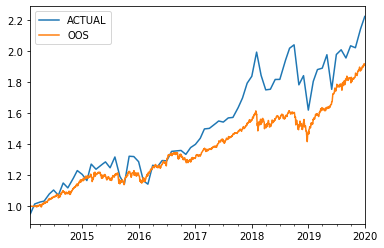

In [6]:
cp_df.plot()